# BITSTAMP BTC/USD market

### Packages

In [1]:
# External packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime 


# Internal packages
import sys
sys.path.append('../../Code/TS_helpers/')
sys.path.append('../Time_Series_Forecasting/')

data_dir = '../Data/Coins/BTC_USD/bitcoin-historical-data/'
from dates_kaggle1min import make_all_time_indexes, make_integer_time_index

class Struct(object): pass




## Tsplot
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'DeepESN'

### Load Data and parse Date

In [11]:
data = pd.read_csv(data_dir + 'wdi_bitstampUSD_1-min.csv', index_col='Unnamed: 0')
# print(data.shape)
# data['time_exchange'] = pd.to_datetime(data['time_exchange'])
data['date'] = pd.to_datetime(data['time_exchange'].astype(str).apply(lambda x: x.split(' ')[0]))
data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_exchange,year,month,day,hour,time_year,time_month,time_day,time_hour,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011,12,31,7,2011,201112,20111231,2011123107,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00,2011,12,31,7,2011,201112,20111231,2011123107,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00,2011,12,31,7,2011,201112,20111231,2011123107,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00,2011,12,31,7,2011,201112,20111231,2011123107,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00,2011,12,31,7,2011,201112,20111231,2011123107,2011-12-31


In [ ]:
# plt.plot(range(data['time_month'].nunique()),((data.groupby('time_month')['Volume_(Currency)'].sum()-data.groupby('time_month')['Volume_(Currency)'].sum().mean())/data.groupby('time_month')['Volume_(Currency)'].sum().std()).values)
# plt.plot(range(data['time_month'].nunique()),((data.groupby('time_month')['Volume_(BTC)'].sum()-data['Volume_(BTC)'].mean())/data['Volume_(BTC)'].std()).values)        

In [28]:
daily_df['daily_log_rets']

date
2011-12-31         NaN
2012-01-01    0.093222
2012-01-02    0.020309
2012-01-03    0.054434
2012-01-04    0.004346
                ...   
2019-08-08    0.002191
2019-08-09    0.001629
2019-08-10   -0.023759
2019-08-11   -0.014465
2019-08-12    0.014658
Name: daily_log_rets, Length: 2779, dtype: float64

### Feats and NA handling

In [ ]:
ohlcvw = ['Open', 'High', 'Low', 'Close', 'Weighted_Price', 'Volume_(BTC)', 'Volume_(Currency)']

### NA imputation

##### OHLCW same as last   //  Volume = 0

In [ ]:
for v in ohlcvw[:4]:
    data[v+'_same'] = data[v].fillna(method='ffill')

for v in ohlcvw[5:]:
    data[v].fillna(0, inplace=True)


### Feat Eng.

#### Volume weighting columns

In [ ]:
for v in ohlcvw:
    if 'Volume' in v:
        continue
    data[v+'_X_Vol_Cur'] = data[v] * data['Volume_(Currency)']
    data[v+'_X_Vol_BTC'] = data[v] * data['Volume_(BTC)']


#### Check that all time cycles are sutiable(with at least one non NA minute)

In [30]:
data['time_5mins'] = (data['time_hour'].astype(str) + data['date'].apply(lambda x: str(int(x.minute/5))).apply(lambda x:'0'+str(x) if int(x)<10 else x) ).astype(int)
data['time_10mins'] = (data['time_hour'].astype(str) + data['time_5mins'].apply(lambda x: str(x[-2:]))
# data['time_15mins'] = (data['time_hour'].astype(str) + data['date'].apply(lambda x: int(x.minute/15) ).astype(str) ).astype(int)
# data['time_30mins'] = (data['time_hour'].astype(str) + data['date'].apply(lambda x: int(x.minute/30) ).astype(str) ).astype(int)

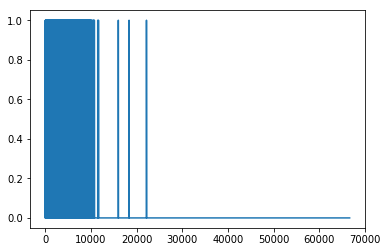

In [35]:
## 5 min windows where no trade waas done


# plt.plot((data.groupby('time_5mins')['Close'].count()==0).values)

In [ ]:
# (data.groupby('time_hour')['Close'].count() == 0).value_counts()

## Simple Aggregations

#### Daily

In [ ]:
# daily = Struct()

# # Daily non na min count (market activity)
# daily.non_na_minute_counts = data.groupby('date')['Close'].count()

# # daily OHLC
# daily.close = data[data['Close'].notna()].groupby('date')['Close'].agg(lambda x: list(x)[-1])
# daily.open =  data[data['Open'].notna()].groupby('date')['Open'].agg(lambda x: list(x)[0])
# daily.high = data[data['High'].notna()].groupby('date')['High'].agg(max)
# daily.low = data[data['Low'].notna()].groupby('date')['Low'].agg(min)

# # daily volume weighted averages
# daily.weighted_price = data.groupby('date')['Weighted_Price_X_Vol_Cur'].sum()/data.groupby('date')['Volume_(Currency)'].sum()
# daily.weighted_close = data.groupby('date')['Close_X_Vol_BTC'].sum()/data.groupby('date')['Volume_(BTC)'].sum()
# daily.weighted_open = data.groupby('date')['Open_X_Vol_BTC'].sum()/data.groupby('date')['Volume_(BTC)'].sum()
# daily.weighted_high = data.groupby('date')['High_X_Vol_BTC'].sum()/data.groupby('date')['Volume_(BTC)'].sum()
# daily.weighted_low = data.groupby('date')['Low_X_Vol_BTC'].sum()/data.groupby('date')['Volume_(BTC)'].sum()

# # Daily volume aggs
# daily.volume_cur = data.groupby('date')['Volume_(Currency)'].sum()
# daily.volume_btc = data.groupby('date')['Volume_(BTC)'].sum()

In [5]:
# pd.to_pickle(daily, './daily_simple_aggs.pkl')
daily = pd.read_pickle('./daily_simple_aggs.pkl')

In [6]:
daily_df = pd.DataFrame({
    'daily_vol_cur': daily.volume_cur,
    'daily_vol_btc': daily.volume_btc,
    'daily_close': daily.close,
    'daily_open': daily.open,
    'daily_high': daily.high, 
    'daily_low': daily.low,
    'daily_we_close': daily.weighted_close,
    'daily_we_open': daily.weighted_open,
    'daily_we_high': daily.weighted_high,
    'daily_we_low': daily.weighted_low,
              
    'daily_we_pr': daily.weighted_price,
    'daily_we_pr_lr': daily.returns.we_pr,
    'daily_non_na_mins': daily.non_na_minute_counts
              })

# daily_df['daily_close'].plot()

In [7]:
daily_log_price = daily.weighted_price.apply(np.log)
daily_rets = (daily.weighted_price/daily.weighted_price.shift())
daily_log_rets = daily_rets.apply(np.log)
daily_trend = (daily_log_rets < 0).apply(lambda x: 'red' if x else 'green')

daily_df['daily_log_rets'] = daily_log_rets
daily_df['daily_rets'] = daily_rets
daily_df['daily_log_price'] = daily_log_price 

In [8]:
# coinmarketcap = pd.read_csv(data_dir + 'BTC_coinmarket_cap.csv')[::-1]
# coinmarketcap['Date'] = pd.to_datetime(coinmarketcap['Date'])
# coinmarketcap.set_index('Date', inplace=True)
# coinmarketcap.head()

In [8]:
# daily_df = daily_df.join(coinmarketcap)
# daily_df.head()

In [9]:
# (daily_log_rets/daily_log_rets.max())[:last_ind]


## Overview

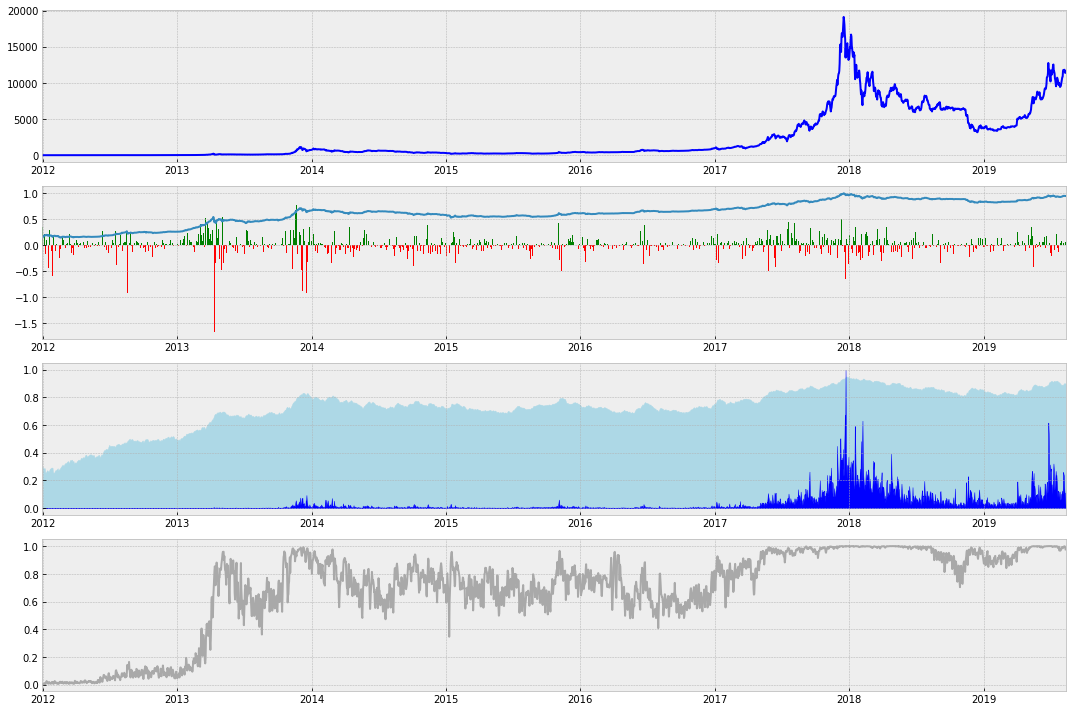

In [15]:

   

show = 1

with plt.style.context('bmh'):
    last_ind = int(show*len(daily_log_rets))
    t = daily_log_rets[:last_ind].index
    
    fig = plt.figure(figsize=(15, 10))
    layout = (4, 2)
    plot1 = plt.subplot2grid(layout, (0, 0), colspan=2)
    plot2 = plt.subplot2grid(layout, (1, 0), colspan=2)
    plot3 = plt.subplot2grid(layout, (2, 0), colspan=2)
    plot4 = plt.subplot2grid(layout, (3, 0), colspan=2)
      
    
    plot1.plot(t, (daily.weighted_price)[:last_ind], color='blue')
#     plot1.plot(t, exp_smooth(daily.weighted_price, alpha=0.1)[:last_ind], color='lightblue')
    
    
    plot2.plot(t, (daily_log_price/daily_log_price.max())[:last_ind])
    plot2.bar(t, (daily_log_rets/daily_log_rets.max())[:last_ind], color=daily_trend[:last_ind])
    

    plot3.fill_between(t, 0, exp_smooth(daily.volume_cur.apply(np.log)/daily.volume_cur.apply(np.log).max())[:last_ind],color='lightblue')
    plot3.fill_between(t, 0, (daily.volume_cur/daily.volume_cur.max())[:last_ind],color='blue')
    
#     plot2.fill_between(s1[:last_ind].index, 0, (daily.volume_btc / daily.non_na_minute_counts)[:last_ind],color='blue')


    plot4.plot(t, exp_smooth(daily.non_na_minute_counts/daily.non_na_minute_counts.max(), 0.5)[:last_ind],color='darkgrey')
#     exp_smooth((daily.volume_cur/daily.non_na_minute_counts)/(daily.volume_cur/daily.non_na_minute_counts).max(), 0.05)[:last_ind].plot(ax=plot4,color='blue')    
    
    
    for plot in [plot1, plot2, plot3, plot4]:
        plot.set_xlim(daily_log_rets.index[0], daily_log_rets.index[last_ind-1])
    plt.tight_layout()

### Train test split

From the plot we make decisions for the train test validation splits

#### Masks 

In [45]:
train_first_day = pd.to_datetime('2013-01-01')
val_first_day = pd.to_datetime('2017-01-01')
test_first_day = pd.to_datetime('2018-02-01')


train_mask = (daily_df.index >= train_first_day) & (daily_df.index < val_first_day)
val_mask = (daily_df.index >= val_first_day) & (daily_df.index < test_first_day)
develop_mask = train_mask | val_mask
test_mask = (daily_df.index >= test_first_day)

masks = {}
masks['train'] = train_mask
masks['valid'] = val_mask
masks['dev'] = develop_mask
masks['test'] = test_mask

### Trend and Seasonailty anlaysis

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_log_price[develop_mask], freq=365)


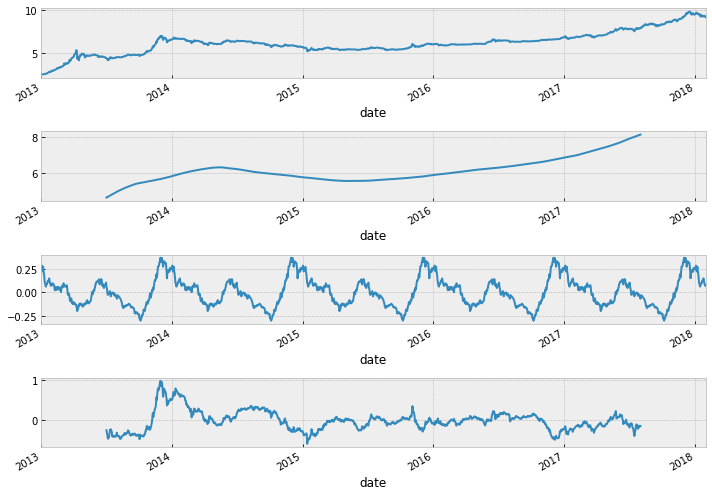

In [48]:
with plt.style.context('bmh'):

    fig = plt.figure(figsize=(10, 7))
    layout = (4, 2)
    plot1 = plt.subplot2grid(layout, (0, 0), colspan=2)
    plot2 = plt.subplot2grid(layout, (1, 0), colspan=2)
    plot3 = plt.subplot2grid(layout, (2, 0), colspan=2)
    plot4 = plt.subplot2grid(layout, (3, 0), colspan=2)
      
    
    decomposition.observed.plot(ax=plot1)
#     (decomposition.observed.mean()*daily.weighted_price[develop_mask]/daily.weighted_price[develop_mask].max()).plot(ax=plot1, color='blue')
    decomposition.trend.plot(ax=plot2)
    decomposition.seasonal.plot(ax=plot3)
    decomposition.resid.plot(ax=plot4)
    
    
    plt.tight_layout()

## Modelling

### Simplest Models

#### No change  (      y_t = y_(t-1)    < == >    log(y_t/y_(t-1) ) = 0    ) 

_This models error is acutally equivalent to standard deviation of the log returns_

In [49]:
print("log_ret = 0 ==> train set error \n"+str(np.sqrt(np.mean((daily_df[masks['train']]['daily_log_rets'].values)**2)).round(4)))
print("log_ret = 0 ==> valid set error \n"+str(np.sqrt(np.mean((daily_df[masks['valid']]['daily_log_rets'])**2)).round(4)))

log_ret = 0 ==> train set error 
0.0439
log_ret = 0 ==> valid set error 
0.0435


#### log ret  = mean(log ret in train)

In [50]:
mean_log_ret = daily_df[train_mask]['daily_log_rets'].mean()
print("log_ret = mean ==> train set error \n"+str(np.sqrt(np.mean((mean_log_ret-daily_df[masks['train']]['daily_log_rets'].values)**2)).round(5)))
print("log_ret = mean ==> valid set error \n"+str(np.sqrt(np.mean((mean_log_ret-daily_df[masks['valid']]['daily_log_rets'].values)**2)).round(5)))

log_ret = mean ==> train set error 
0.04381
log_ret = mean ==> valid set error 
0.04319


#### Exponential Smoothing

In [52]:
## Tune the alpha parameter

train_er = []
val_er = []

max_ = 50
for i in range(1, max_-1):
    alpha = 0.01/(max_)*i
    daily_df['daily_log_rets_exp_sm'] = exp_smooth(daily_df['daily_log_rets'], alpha=alpha)
    train_er.append(np.sqrt(np.mean((daily_df[train_mask]['daily_log_rets_exp_sm']-daily_df[masks['train']]['daily_log_rets'].values)**2)))
    val_er.append(np.sqrt(np.mean((daily_df[val_mask]['daily_log_rets_exp_sm']-daily_df[masks['valid']]['daily_log_rets'].values)**2)))

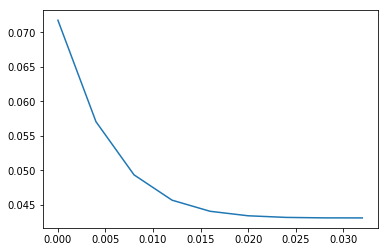

In [56]:
k=9

# plt.plot(range(0, k), train_er[:k])
plt.plot([i*0.2/max_ for i in range(0, k)], val_er[:k])

In [76]:
daily_df['daily_log_rets_exp_sm'] = exp_smooth(daily_df['daily_log_rets'], alpha=0.026)

In [77]:
print("train set error \n"+str(np.sqrt(np.mean((daily_df[train_mask]['daily_log_rets_exp_sm']-daily_df[masks['train']]['daily_log_rets'].values)**2)).round(5)))
print("valid set error \n"+str(np.sqrt(np.mean((daily_df[val_mask]['daily_log_rets_exp_sm']-daily_df[masks['valid']]['daily_log_rets'].values)**2)).round(5)))

train set error 
0.04376
valid set error 
0.04329


### Rolling means

In [88]:
for window_len in [2, 3,7, 30, 60, 100]:
    daily_df['daily_log_rets_'+str(window_len)+'rm'] = daily_df['daily_log_rets'].rolling(window=window_len).mean()-daily_df['daily_log_rets']

train set error 
0.065
valid set error 
0.064


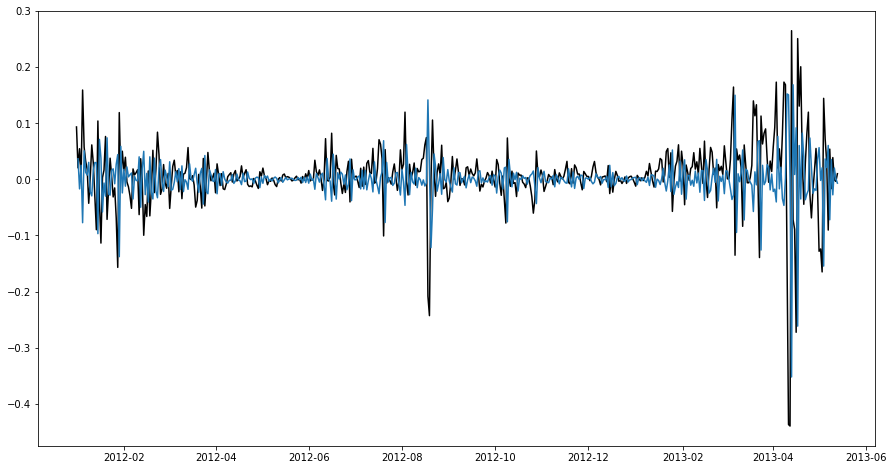

In [93]:
plt.figure(figsize=(15,8))
k=500
plt.plot(daily_df['daily_log_rets'][:k], color='black')
for window_len in [2]:
    print_rmse(daily_df['daily_log_rets_'+str(window_len)+'rm'], masks)
    plt.plot(daily_df['daily_log_rets_'+str(window_len)+'rm'][:k])


In [95]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

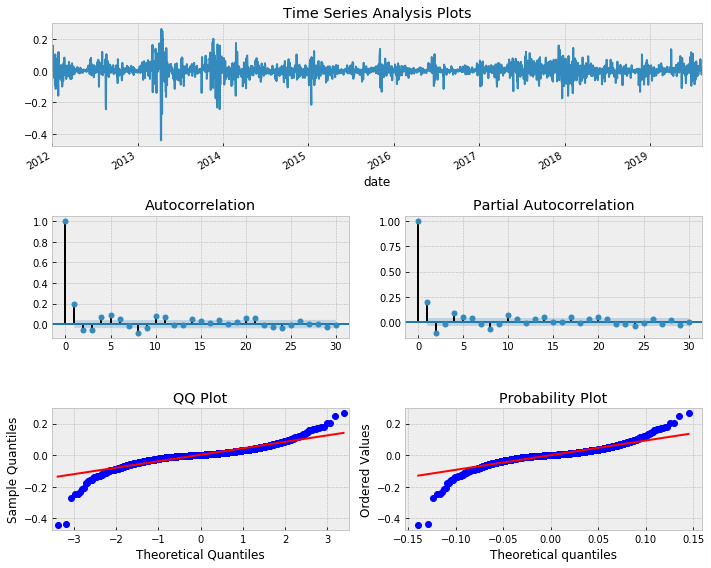

In [98]:
tsplot(daily_df['daily_log_rets'].dropna(), lags=30)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

aic: -5100.01 | order: (4, 0, 3)


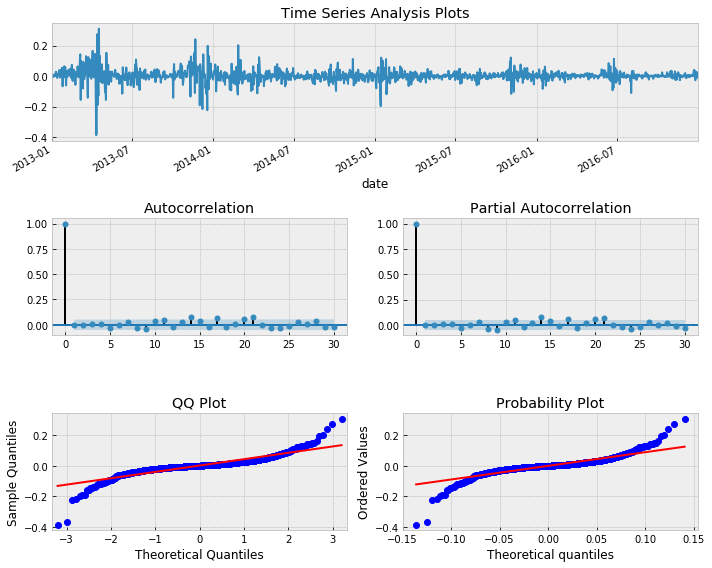

In [99]:
# Fit ARIMA(p, d, q) model to SPX log returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(daily_df[train_mask]['daily_log_rets'].dropna(), 
                          order=(i,d,j)).fit(method='mle',
                          trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

In [100]:
# np.sqrt(((best_mdl.predict() - daily_df[train_mask]['daily_log_rets'])**2).mean())
np.sqrt(((best_mdl.forecast(val_mask.sum())[0] - daily_df[masks['valid']]['daily_log_rets'])**2).mean())




0.0434678029554648

In [101]:
np.sqrt(((0 - daily_df[masks['valid']]['daily_log_rets'])**2).mean())

0.04348881799302099

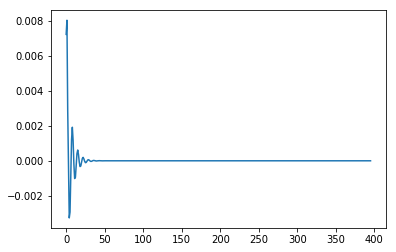

In [245]:
plt.plot(best_mdl.forecast(val_mask.sum())[0])

In [250]:
best_mdl.maparams

array([-0.42148928,  0.10084001,  0.32309632,  0.21183976])

In [276]:
daily_df['daily_we_pr'+'_X_'+'vol_cur'] = daily_df['daily_we_pr'] * daily_df['daily_vol_cur']

for window_len in [3,7, 30, 60, 100]:
    daily_df['daily_we_pr_'+str(window_len)+'r_vw_m'] = (daily_df['daily_we_pr'+'_X_'+'vol_cur'].rolling(window=window_len).sum() - daily_df['daily_we_pr'+'_X_'+'vol_cur']) / (daily_df['daily_vol_cur'].rolling(window=window_len).sum() - daily_df['daily_vol_cur'])



# def rollingvolwe_mean(df, averaged_col, weight_col):
#     df[averaged_col+'_X_'+weight_col] = df[averaged_col]*df[weight_col]
#     rm = []
#     for t in df.index:
#         mask = df.index <= t
#         val = df[mask][averaged_col+'_X_'+weight_col].sum()/df[mask][weight_col].sum()
#         rm.append(val)
#     return pd.Series(index=df.index,data=rm)


In [283]:
# dif = (daily_df['daily_we_pr_'+str(window_len)+'r_vw_m']/daily_df['daily_we_pr_'+str(window_len)+'r_vw_m'].shift()).apply(np.log)[val_mask] - daily_df[train_mask]['daily_log_rets']
# np.sqrt(np.mean(dif**2))
# dif
# daily_df[train_mask]['daily_log_rets']
for window_len in [3,7, 30, 60, 100]:
    daily_df['daily_log_rets_'+str(window_len)+'r_vw_m'] = (daily_df['daily_we_pr_'+str(window_len)+'r_vw_m']/daily_df['daily_we_pr_'+str(window_len)+'r_vw_m'].shift()).apply(np.log)


# np.sqrt(np.mean(dif**2))


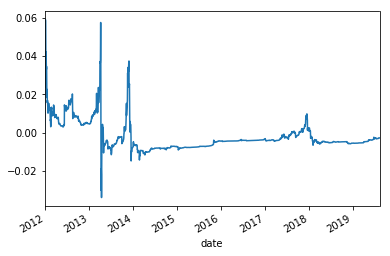

In [87]:
daily_df['daily_log_rets_vwe_rm'].plot()

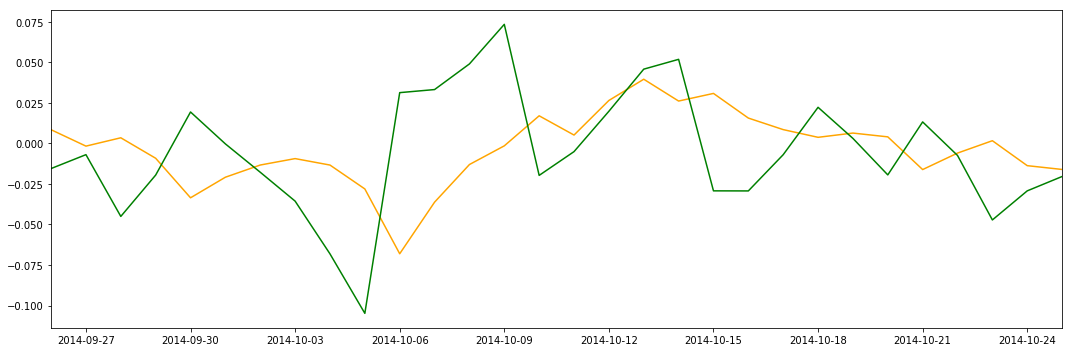

In [288]:
plt.figure(figsize=(15,5))

begin = 1000
days = 30
# plt.plot(daily_df.index[begin:begin+days], daily_df['daily_log_rets_exp_sm'][begin:begin+days], color='blue')
plt.plot(daily_df.index[begin:begin+days], daily_df['daily_log_rets_7r_vw_m'][begin:begin+days], color='orange')
plt.plot(daily_df.index[begin:begin+days], daily_df['daily_log_rets'][begin:begin+days], color='green')

plt.xlim(daily_df.index[begin:begin+days][0],daily_df.index[begin:begin+days][-1])
plt.tight_layout()

# daily_df['daily_log_rets_vwe_rm']
# daily_df['daily_log_rets']

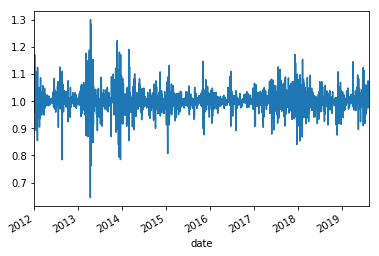

In [182]:
daily_df['daily_rets'].plot()

#### Input output signals

In [293]:
target_signal_tr = daily_df[train_mask]['daily_vol_cur'][1:]
target_signal_val = daily_df[val_mask]['daily_vol_cur'][1:]
target_signal_te = daily_df[test_mask]['daily_vol_cur'][1:]

target_signals = {}
target_signals['tr'] = target_signal_tr
target_signals['val'] = target_signal_val
target_signals['te'] = target_signal_te

for div, signal in target_signals.items():
    target_signals[div] = signal.apply(np.std)

feats = [
#          'daily_log_rets',
#         'daily_log_rets',
#          'daily_log_rets_rm', 
#          'daily_vol_cur', 
#          'daily_non_na_mins', 
#          'daily_we_pr' ,
#     'daily_log_rets_30rm'
        
        ]
# feats= []

# Normalization of input signals
# input_signal_tr = ((daily_df[feats][train_mask]-daily_df[train_mask][feats].mean())/daily_df[train_mask][feats].std())[:-1]
# input_signal_val = ((daily_df[feats][val_mask]-daily_df[train_mask][feats].mean())/daily_df[train_mask][feats].std())[:-1]
# input_signal_te = ((daily_df[feats][test_mask]-daily_df[train_mask][feats].mean())/daily_df[train_mask][feats].std())[:-1]

# daily_df['daily_vol_cur']


input_signals = {}
input_signals['tr'] = daily_df[feats][train_mask][:-1]
input_signals['val'] = daily_df[feats][val_mask][:-1]
input_signals['te'] = daily_df[feats][test_mask][:-1]

for name, df in input_signals.items():
    df['bias'] = 1

input_signals['tr'].apply(['mean', 'std'])

,bias
mean,1.0
std,0.0


In [294]:
# Are the time indexes of signals correct? ( input = 1,2,3 ,... , N-1  ,  output =  2,3,4 , ... , N )

for part in ['tr', 'val', 'te']:
    
    input_signal = input_signals[part]
    target_signal = target_signals[part]
    a=set(input_signal.index).difference(set(target_signal.index))==set([input_signal.index[0]]) and set(target_signal.index).difference(set(input_signal.index))==set([target_signal.index[-1]])
    print(a)


True
True
True


## PyESN

In [291]:
# ## BEST SO FAR LOL


# import pyESN

# esn = pyESN.ESN(n_inputs = input_signals['tr'].shape[1],
#           n_outputs = 1,
#           n_reservoir = 1,
#           sparsity=0.1,
#           spectral_radius = 0.001,
#           noise=10,
#           input_scaling=True,
#           teacher_forcing=True,
#           random_state=42)


# train_preds = esn.fit(input_signals['tr'].values, target_signal_tr.values)
# print("train error: \n"+str(np.sqrt(np.mean((train_preds.flatten() - target_signal_tr.values)**2)).round(5)))

# prediction = esn.predict(inputs=input_signals['val'].values)
# print("test          \nvalid error: \n"+str(np.sqrt(np.mean((prediction.flatten() - target_signal_val.values)**2)).round(5)))
# print("y = 1 valid error: \n"+str(np.sqrt(np.mean((target_signal_val.values)**2)).round(5)))
# print("y = mean(y^tr) valid error: \n"+str(np.sqrt(np.mean((daily_df['daily_log_rets'][train_mask].mean() - target_signal_val.values)**2)).round(5)))

train error: 
0.04229
test          
valid error: 
0.04322
y = 1 valid error: 
0.04351
y = mean(y^tr) valid error: 
0.04322


In [305]:
import pyESN

esn = pyESN.ESN(n_inputs = input_signals['tr'].shape[1],
          n_outputs = 1,
          n_reservoir = 3,
          sparsity=0.1,
          spectral_radius = 0.01,
          noise=100,
          input_scaling=True,
          teacher_forcing=True,
          random_state=42)


train_preds = esn.fit(input_signals['tr'].values, target_signal_tr.values)
print("train error: \n"+str(np.sqrt(np.mean((train_preds.flatten() - target_signal_tr.values)**2)).round(5)))

prediction = esn.predict(inputs=input_signals['val'].values)
print("test          \nvalid error: \n"+str(np.sqrt(np.mean((prediction.flatten() - target_signal_val.values)**2)).round(5)))
print("y = 1 valid error: \n"+str(np.sqrt(np.mean((target_signal_val.shift()-target_signal_val)**2)).round(5)))
print("y = mean(y^tr) valid error: \n"+str(np.sqrt(np.mean((target_signal_tr.mean() - target_signal_val.values)**2)).round(5)))

train error: 
6144112.51962
test          
valid error: 
112562959.30373
y = 1 valid error: 
54377311.92441
y = mean(y^tr) valid error: 
112562235.78918


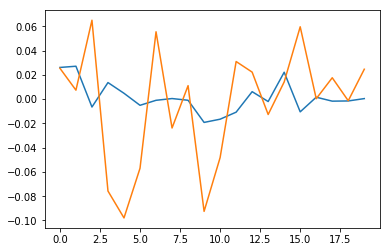

In [194]:
k=20
plt.plot(range(k), prediction[:k])
plt.plot(range(k), target_signal_val[:k])
# plt.plot(range(k), target_signal_val[:k].shift())

In [97]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# # define model

# n_steps = 


# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# # model.add(LSTM(50, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')


# # model = tf.keras.Sequential()
# # model.add(tf.keras.layers.Input(input_shape=input_signal_tr.shape[1]))
# # model.add(tf.keras.layers.LSTM(50, return_sequences=True ))
# # model.add(tf.keras.layers.Dense(1, activation=None))
# # model.compile(optimizer='adam')

# input_ = input_signals['tr'].values.reshape(input_signals['tr'].values.shape[0],input_signals['tr'].values.shape[1])
# model.fit(input_, target_signals['tr'].values)

In [178]:


# plt.figure(figsize=(20,5))
# # plt.bar(range(len(target_signal_tr)+1 , len(target_signal)-1),target_signal_val,label="target system")
# plt.bar(range(len(target_signal_tr)+1 , len(target_signal)-1),prediction, label="free running ESN")
# # lo,hi = plt.ylim()
# # plt.plot([len(target_signal_tr),len(target_signal_tr)],[lo+np.spacing(1),hi-np.spacing(1)],'k:')

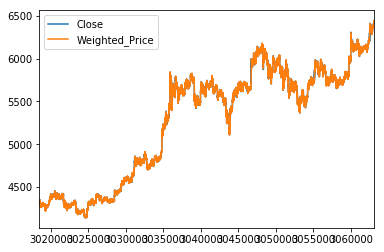

In [110]:
data[data['time_month'] == 201710][['Close', 'Weighted_Price']][:].plot()

## Targets

#### Daily returns on weighted Price

In [12]:
daily.returns = Struct()
daily.returns.we_pr = (daily.weighted_price/daily.weighted_price.shift()).apply(np.log)

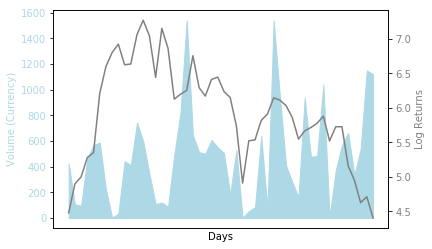

In [34]:
count = data.groupby('date')['Close'].count()

# alpha = 0.1

# daily.volume_btc.cumsum()
volume = daily.volume_cur[:50]


fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index[:50]
data1 = volume.values[:50]
data2 = (daily.weighted_close.values)[:50]

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
# ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(0, 2)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [176]:
import pyESN

esn = pyESN.ESN(n_inputs = input_signals['tr'].shape[1],
          n_outputs = 1,
          n_reservoir = 20,
                sparsity=0.5,
          spectral_radius = 0.1,
                noise=1,
          input_scaling=True,
          teacher_forcing=True,
          random_state=42)


train_preds = esn.fit(input_signals['tr'].values, target_signal_tr.values)
print("train error: \n"+str(np.sqrt(np.mean((train_preds.flatten() - target_signal_tr.values)**2)).round(4)))

prediction = esn.predict(inputs=input_signals['val'].values)
print("test          \nvalid error: \n"+str(np.sqrt(np.mean((prediction.flatten() - target_signal_val.values)**2)).round(4)))
print("y = 0 valid error: \n"+str(np.sqrt(np.mean((target_signal_val.values)**2)).round(4)))
print("y = mean(y^tr) valid error: \n"+str(np.sqrt(np.mean((daily_df['daily_close'][train_mask].mean() - target_signal_val.values)**2)).round(4)))

print("y = y_t-1 valid error: \n"+str(np.sqrt(np.mean((daily_df['daily_close'][val_mask].shift() - target_signal_val)**2)).round(4)))


train error: 
122.1303
test          
valid error: 
6182.9864
y = 0 valid error: 
6524.8341
y = mean(y^tr) valid error: 
6304.4943
y = y_t-1 valid error: 
421.8047


In [106]:
# fix a seed for the reproducibility of results
np.random.seed(7)
  
# Be careful with memory usage
Nr = 100 # number of recurrent units
Nl = 5 # number of recurrent layers
reg = 0.0;
transient = 100
    
deepESN = DeepESN(Nu, Nr, Nl, configs)


NameError: name 'Nu' is not defined